In [1]:
import matplotlib.pyplot as plt
import torch

from blocks import CosBlock, SinBlock, Log2Block, LnBlock, Log10Block, LinearBlock, SigmoidBlock
from model import ModelFactory, MultiLayerModelFactory

# Better printing

## Simple model

In [2]:
x = torch.arange(1, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(x) + torch.log2(x)
model = ModelFactory(x, y, max_size=2).from_class_list([CosBlock, SinBlock, Log2Block, LnBlock, Log10Block])
pred = model.forward(x)

In [3]:
print(model)

y = sin(x) * 0.9856 + log2(x) * 1.0170


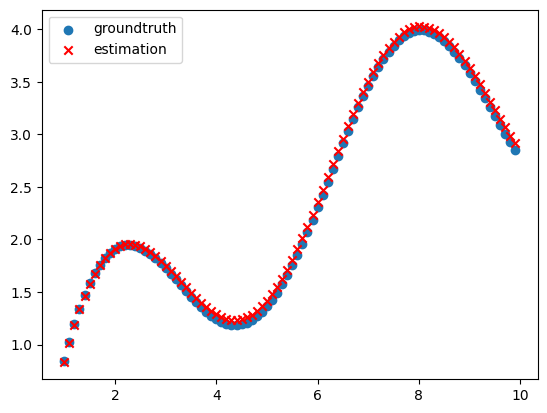

In [4]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## Multi-layer model

In [61]:
from blocks import BiasBlock

torch.autograd.set_detect_anomaly(True)

x = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(torch.cos(x) + torch.sin(x)) + torch.cos(torch.sin(x) * torch.cos(x))
model = MultiLayerModelFactory(x, y, max_size=2, layers=2, epochs=10000).from_class_list(
    [CosBlock, SinBlock, BiasBlock])
pred = model.forward(x)

In [62]:
print(model)

y = (sin((cos(x) * 0.7700 + sin(x) * 0.1042)) * 0.4332 + 0.5894) * 0.0001


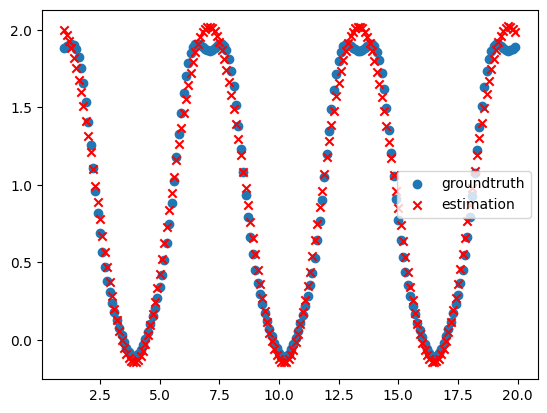

In [63]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## 3D model

In [64]:
x1 = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
x2 = torch.exp(torch.arange(1, 2.9, 0.01, dtype=torch.float32)).unsqueeze(-1)
x3 = torch.log(torch.arange(1, 57.9, 0.3, dtype=torch.float32).unsqueeze(-1))
x = torch.hstack([x1, x2, x3])
y = torch.sin(x1) + torch.cos(x1 * x2) + torch.log(0.4 + x2 * x3)

model = MultiLayerModelFactory(x, y, max_size=2, layers=2).from_class_list(
    [CosBlock, SinBlock, LinearBlock, SigmoidBlock])
pred = model.forward(x)

In [65]:
print(model)

y = (cos((sin(x) * [[0.3704], [-0.0480], [-0.8767]] + sigmoid(x) * [[0.4507], [-0.1547], [2.3395]])) * [[0.7200], [0.6923], [0.8734]] + sin((cos(x) * [[-0.1553], [-0.2189], [-0.5763]] + sin(x) * [[0.5676], [-0.0300], [-0.3145]])) * [[0.9950], [0.8921], [0.9905]]) * [[0.4476], [0.5399], [0.9284]]


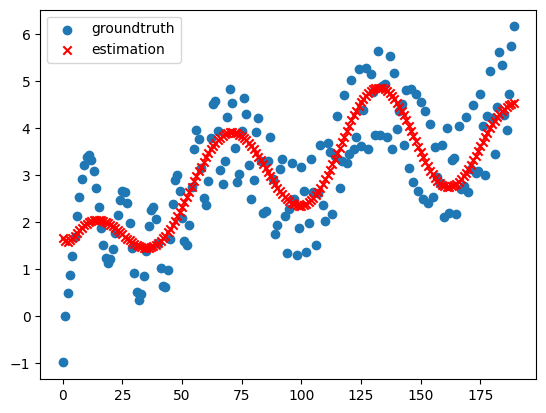

In [66]:
plt.scatter(list(range(len(y))), y, label="groundtruth")
plt.scatter(list(range(len(y))), pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()